In [1]:
import pandas as pd
import numpy as np

In [2]:
boston = pd.read_csv("C:/Users/DELL/Desktop/ALL CSV FILES - 2nd Edition/Boston.csv")

In [3]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [16]:
#b-)
boston.shape
#The rows reresent the nighbourhood(whos neighbor) and the columns tell us about the stats of different things like crimes etc in the nighborhood 


(506, 14)

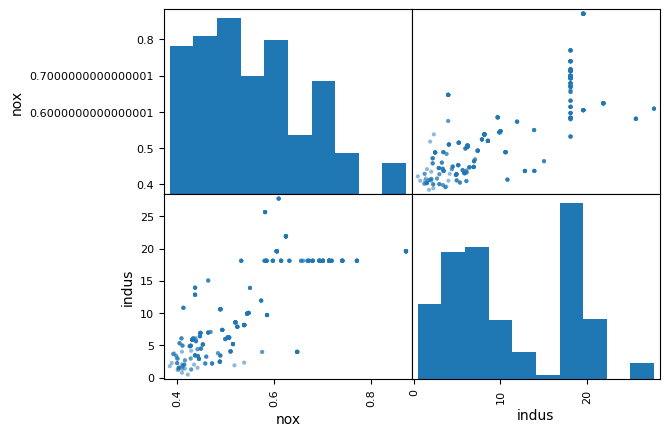

In [23]:
#c-)
#when nox air population increases indus increases
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(boston[['nox','indus']])
plt.show()

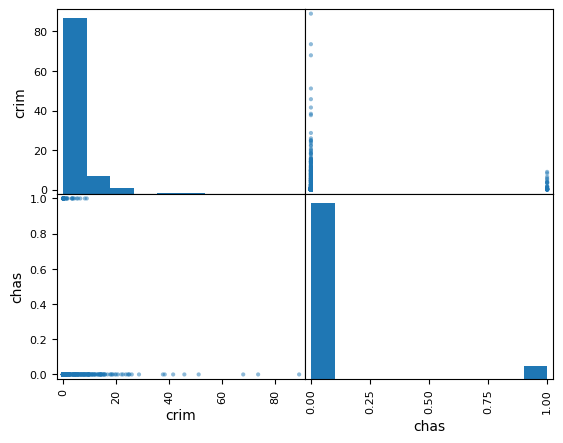

In [27]:
#when crim and zn no relation

pd.plotting.scatter_matrix(boston[['crim','chas']])
plt.show()

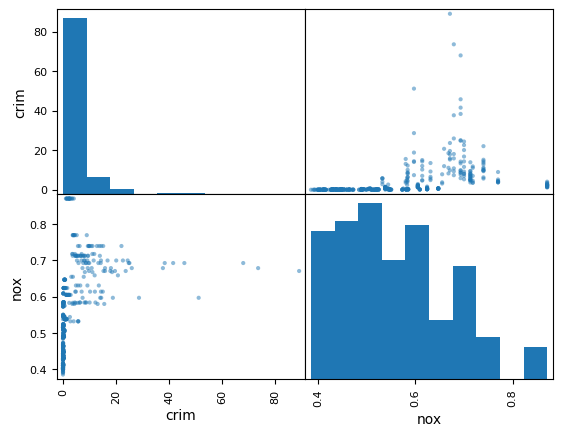

In [28]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(boston[['crim','nox']])
plt.show()

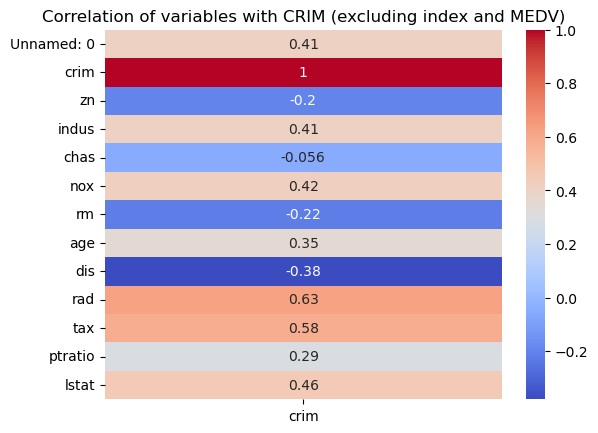

In [32]:
#d-)2 places affect where highway affects
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'index' and 'medv' columns before correlation
corr = boston.drop(columns=['medv']).corr()

# Plot correlation of other variables with 'crim'
sns.heatmap(corr[['crim']], annot=True, cmap='coolwarm')
plt.title('Correlation of variables with CRIM (excluding index and MEDV)')
plt.show()


In [34]:
#e-)
boston[['tax','ptratio','crim']].describe()

,tax,ptratio,crim
count,506.000000,506.000000,506.000000
mean,408.237154,18.455534,3.613524
std,168.537116,2.164946,8.601545
min,187.000000,12.600000,0.006320
25%,279.000000,17.400000,0.082045
50%,330.000000,19.050000,0.256510
75%,666.000000,20.200000,3.677083
max,711.000000,22.000000,88.976200


crime hass wide range 
ptrario shows us there is less varaition
crim changes with tax means tax affect the crim and it is increasingg highly in by increase in tax

In [36]:
#f
boston['chas'].value_counts()


chas
0    471
1     35
Name: count, dtype: int64

In [37]:
#g
boston['ptratio'].median()


19.05

In [38]:
#h
# Find the row with the lowest median home value
lowest_medv_index = boston['medv'].idxmin()
lowest_medv_row = boston.loc[lowest_medv_index]

# Print all predictor values for that suburb
print("Suburb with lowest MEDV:")
print(lowest_medv_row)

# Now compare each value with the dataset's min and max (range)
print("\nRanges for each predictor in the dataset:")
print(boston.describe().loc[['min', 'max']])


Suburb with lowest MEDV:
Unnamed: 0    399.0000
crim           38.3518
zn              0.0000
indus          18.1000
chas            0.0000
nox             0.6930
rm              5.4530
age           100.0000
dis             1.4896
rad            24.0000
tax           666.0000
ptratio        20.2000
lstat          30.5900
medv            5.0000
Name: 398, dtype: float64

Ranges for each predictor in the dataset:
     Unnamed: 0      crim     zn  indus  chas    nox     rm    age      dis  \
min         1.0   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   
max       506.0  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265   

      rad    tax  ptratio  lstat  medv  
min   1.0  187.0     12.6   1.73   5.0  
max  24.0  711.0     22.0  37.97  50.0  


In [39]:
#i
# Suburbs with more than 7 rooms
more_than_7 = boston[boston['rm'] > 7]
print("Number of suburbs with more than 7 rooms:", more_than_7.shape[0])

# Suburbs with more than 8 rooms
more_than_8 = boston[boston['rm'] > 8]
print("Number of suburbs with more than 8 rooms:", more_than_8.shape[0])

# View these high-room suburbs
print("\nSuburbs with more than 8 rooms per dwelling:")
print(more_than_8)


Number of suburbs with more than 7 rooms: 64
Number of suburbs with more than 8 rooms: 13

Suburbs with more than 8 rooms per dwelling:
     Unnamed: 0     crim    zn  indus  chas     nox     rm   age     dis  rad  \
97           98  0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2   
163         164  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5   
204         205  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4   
224         225  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8   
225         226  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8   
226         227  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8   
232         233  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8   
233         234  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8   
253         254  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7   
257         258  0.61154  20.0   3.97     0  0.6470  8